In [1]:
import sys
sys.path.append('../src')

import pandas as pd
import matplotlib.pyplot as plt

from portfolio import merge_price_files, calculate_daily_returns, calculate_cumulative_returns


/Users/phemo/Projects 2.0/quant-portfolio-sim/notebooks/../src/portfolio.py:22: SyntaxWarning: invalid escape sequence '\$'
  df[ticker]= df[ticker].replace('[\$,]', '', regex=True).astype(float)


#Combining all CVSs for my my selcted stocks into a single file.

In [2]:
folder = '../data/'
tickers = ['AAPL', 'MSFT', 'TSLA', 'JPM', 'XOM', 'TLT', 'BND', 'SHV', 'SPY', 'GLD']
merged_prices = merge_price_files(folder, tickers)
merged_prices.head()


,AAPL,MSFT,TSLA,JPM,XOM,TLT,BND,SHV,SPY,GLD
Date,,,,,,,,,,
2020-05-04,73.2900,178.84,50.7460,92.14,44.88,167.16,87.39,110.81,283.57,160.34
2020-05-05,74.3900,180.76,51.2140,92.00,44.83,166.09,87.31,110.82,286.19,161.02
2020-05-06,75.1575,182.54,52.1720,90.27,43.99,163.41,86.92,110.80,284.25,158.95
2020-05-07,75.9350,183.60,52.0027,91.21,44.24,166.14,87.20,110.80,287.68,161.39
2020-05-08,77.5325,184.68,54.6280,92.70,46.18,163.98,86.95,110.81,292.44,160.42


Running the daily retuns function

In [3]:
daily_returns = calculate_daily_returns(merged_prices)
daily_returns.head()


,AAPL,MSFT,TSLA,JPM,XOM,TLT,BND,SHV,SPY,GLD
Date,,,,,,,,,,
2020-05-05,0.015009,0.010736,0.009222,-0.001519,-0.001114,-0.006401,-0.000915,0.00009,0.009239,0.004241
2020-05-06,0.010317,0.009847,0.018706,-0.018804,-0.018737,-0.016136,-0.004467,-0.00018,-0.006779,-0.012856
2020-05-07,0.010345,0.005807,-0.003245,0.010413,0.005683,0.016706,0.003221,0.00000,0.012067,0.015351
2020-05-08,0.021038,0.005882,0.050484,0.016336,0.043852,-0.013001,-0.002867,0.00009,0.016546,-0.006010
2020-05-11,0.015735,0.011154,-0.009922,-0.029450,-0.009528,-0.007806,-0.003105,-0.00018,0.000205,-0.006234


running the cumulative returns function

In [4]:
cumulative_returns = calculate_cumulative_returns(daily_returns)
cumulative_returns.head()


,AAPL,MSFT,TSLA,JPM,XOM,TLT,BND,SHV,SPY,GLD
Date,,,,,,,,,,
2020-05-05,1.015009,1.010736,1.009222,0.998481,0.998886,0.993599,0.999085,1.00009,1.009239,1.004241
2020-05-06,1.025481,1.020689,1.028101,0.979705,0.980169,0.977566,0.994622,0.99991,1.002398,0.991331
2020-05-07,1.036090,1.026616,1.024765,0.989907,0.985740,0.993898,0.997826,0.99991,1.014494,1.006549
2020-05-08,1.057886,1.032655,1.076499,1.006078,1.028966,0.980976,0.994965,1.00000,1.031280,1.000499
2020-05-11,1.074533,1.044174,1.065818,0.976449,1.019162,0.973319,0.991876,0.99982,1.031491,0.994262


Plot Description

This chart shows the cumulative returns of 10 assets over the past 5 years.

X-axis: Dates.
Y-axis: Cumulative return (growth of $1 invested).
Lines: Each asset’s performance.

It compares stocks, bonds, and other assets to highlight growth and stability trends over time.


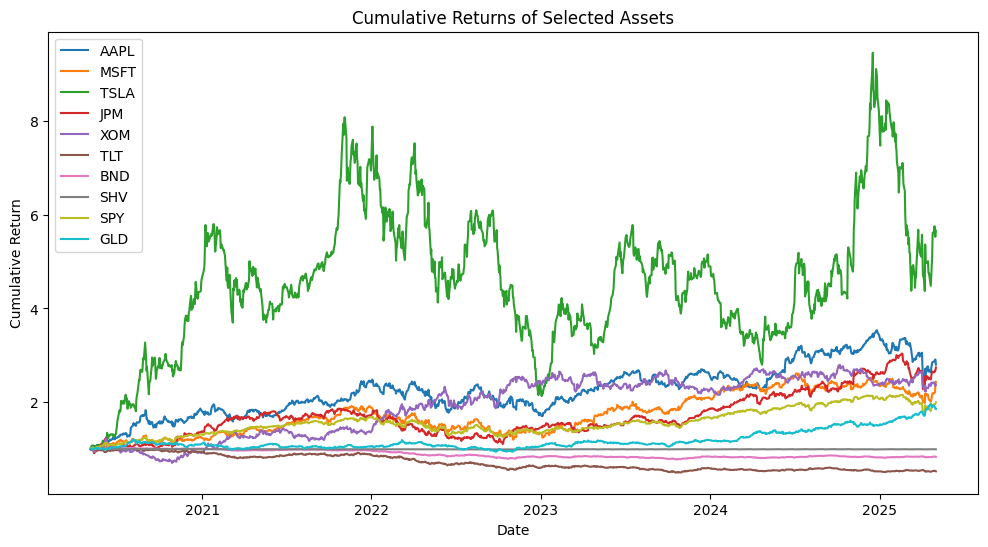

In [5]:
plt.figure(figsize=(12, 6))
for column in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[column], label=column)

plt.title('Cumulative Returns of Selected Assets')
plt.xlabel('Date')    
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()